# <span style="color:darkblue"> Laboratorio di Simulazioni Numeriche </span>
## <span style="color:purple"> Lezione 5.2 - Campionamento Monte Carlo dell'Orbitale 2p dell'Idrogeno </span>

### Obiettivo
Utilizzare l'**algoritmo di Metropolis** per campionare la densità di probabilità $|\Psi_{2,1,0}(\vec{r})|^2$ dell'orbitale 2p dell'atomo di idrogeno e stimare il valore atteso del raggio $\langle r \rangle$.

<p style="border:2px; border-style:solid; border-color:#E6E6FA; padding: 1em; background-color:#F0F8FF">
<b>Orbitale 2p dell'Idrogeno (2p_z, m=0):</b><br>
$$\Psi_{2,1,0}(r,\theta,\phi) = \frac{1}{2\sqrt{6}\sqrt{\pi a_0^5}} r e^{-r/2a_0} \cos(\theta)$$
<br>
<b>Densità di probabilità:</b><br>
$$|\Psi_{2,1,0}(\vec{r})|^2 = \frac{1}{24\pi a_0^5} r^2 e^{-r/a_0} \cos^2(\theta)$$
<br>
<b>Valore atteso teorico:</b><br>
$$\langle r \rangle_{teorico} = 5a_0 = 5.0 \text{ (unità di Bohr)}$$
<br>
<b>Caratteristiche distintive:</b><br>
• <b>Anisotropia</b>: Preferenza per direzione z (cos²θ)<br>
• <b>Nodo radiale</b>: Probabilità nulla all'origine<br>
• <b>Estensione maggiore</b>: Raggio medio 5 volte maggiore del 1s
</p>

=== CAMPIONAMENTO MONTE CARLO ORBITALE 2p IDROGENO ===
Numero di blocchi analizzati: 100
Range convergenza: 4.9828 → 5.0555

Risultati finali:
  Monte Carlo: ⟨r⟩ = 5.055490 ± 0.061728 a₀
  Teorico:     ⟨r⟩ = 5.000000 a₀
  Deviazione:       0.055490 a₀ (0.9σ)
  Accuratezza relativa: 1.1098%


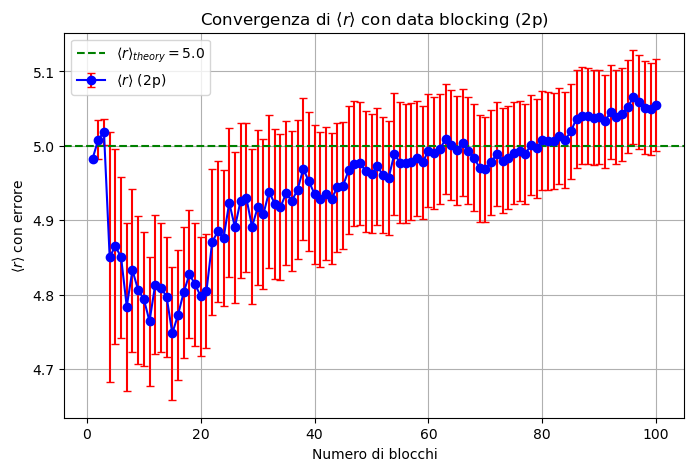

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### **Analisi della Convergenza del Valore Atteso ⟨r⟩ per l'Orbitale 2p**

# Caricamento dati
data = np.loadtxt("r_mean_psi210.dat")

# Estrazione colonne
N_blocks = data[:, 0]  # Numero del blocco
mean_r = data[:, 1]    # Media progressiva di <r>
error_r = data[:, 2]   # Errore statistico

print("=== CAMPIONAMENTO MONTE CARLO ORBITALE 2p IDROGENO ===")
print(f"Numero di blocchi analizzati: {len(N_blocks)}")
print(f"Range convergenza: {mean_r[0]:.4f} → {mean_r[-1]:.4f}")

# Risultati finali
r_theory = 5.0  # Valore teorico per l'orbitale 2p (in unità di Bohr)
r_final = mean_r[-1]
error_final = error_r[-1]
deviation = abs(r_final - r_theory)

print(f"\nRisultati finali:")
print(f"  Monte Carlo: ⟨r⟩ = {r_final:.6f} ± {error_final:.6f} a₀")
print(f"  Teorico:     ⟨r⟩ = {r_theory:.6f} a₀")
print(f"  Deviazione:       {deviation:.6f} a₀ ({deviation/error_final:.1f}σ)")

# Accuratezza relativa
accuracy = deviation / r_theory * 100
print(f"  Accuratezza relativa: {accuracy:.4f}%")

# Plot della media progressiva di <r> con errore
plt.figure(figsize=(8,5))
plt.errorbar(N_blocks, mean_r, yerr=error_r, fmt="o-", color="b", ecolor="r", capsize=3, label=r"$\langle r \rangle$ (2p)")

# Linea orizzontale per il valore asintotico atteso (teorico per l'orbitale 2p)
plt.axhline(y=r_theory, color="g", linestyle="--", label=r"$\langle r \rangle_{theory} = 5.0$")

# Personalizzazione del grafico
plt.xlabel("Numero di blocchi")
plt.ylabel(r"$\langle r \rangle$ con errore")
plt.title(r"Convergenza di $\langle r \rangle$ con data blocking (2p)")
plt.legend()
plt.grid(True)

# Salva e mostra il plot
plt.savefig("r_convergence_2p.png", dpi=300)
plt.show()

=== ANALISI DISTRIBUZIONE SPAZIALE ORBITALE 2p ===
Posizioni campionate: 77279
Range x: [-12.737, 12.679] a₀
Range y: [-10.146, 13.606] a₀
Range z: [-17.411, 15.814] a₀
Raggio medio: ⟨r⟩ = 5.1501 a₀

Test anisotropia 2p_z:
  Centri di massa: ⟨x⟩=0.084767, ⟨y⟩=0.068896, ⟨z⟩=0.464739
  Varianze: Var(x)=6.355930, Var(y)=6.056164, Var(z)=19.129469
  Rapporto Var(z)/Var(x): 3.010

Distribuzione nei lobi:
  Lobo z > 0: 43165 punti (55.9%)
  Lobo z < 0: 34114 punti (44.1%)
  Asimmetria: 11.71%


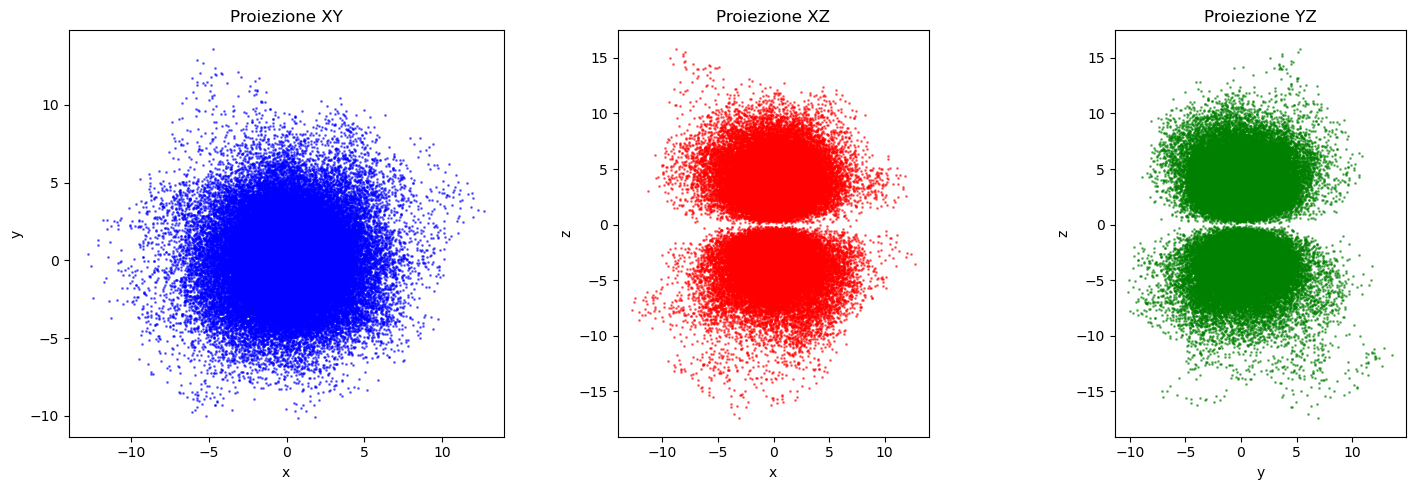

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Carica le posizioni campionate
positions = np.loadtxt("positions_psi210.dat")

x = positions[:, 0]
y = positions[:, 1]
z = positions[:, 2]

print("=== ANALISI DISTRIBUZIONE SPAZIALE ORBITALE 2p ===")
print(f"Posizioni campionate: {len(positions)}")

# Statistiche delle coordinate
r = np.sqrt(x**2 + y**2 + z**2)
r_mean = np.mean(r)
print(f"Range x: [{x.min():.3f}, {x.max():.3f}] a₀")
print(f"Range y: [{y.min():.3f}, {y.max():.3f}] a₀") 
print(f"Range z: [{z.min():.3f}, {z.max():.3f}] a₀")
print(f"Raggio medio: ⟨r⟩ = {r_mean:.4f} a₀")

# Test di anisotropia (caratteristica del 2p_z)
mean_x, mean_y, mean_z = np.mean(x), np.mean(y), np.mean(z)
var_x, var_y, var_z = np.var(x), np.var(y), np.var(z)

print(f"\nTest anisotropia 2p_z:")
print(f"  Centri di massa: ⟨x⟩={mean_x:.6f}, ⟨y⟩={mean_y:.6f}, ⟨z⟩={mean_z:.6f}")
print(f"  Varianze: Var(x)={var_x:.6f}, Var(y)={var_y:.6f}, Var(z)={var_z:.6f}")
print(f"  Rapporto Var(z)/Var(x): {var_z/var_x:.3f}")

# Analisi lobi
lobo_positivo = z > 0
lobo_negativo = z < 0
n_pos = np.sum(lobo_positivo)
n_neg = np.sum(lobo_negativo)

print(f"\nDistribuzione nei lobi:")
print(f"  Lobo z > 0: {n_pos} punti ({100*n_pos/len(z):.1f}%)")
print(f"  Lobo z < 0: {n_neg} punti ({100*n_neg/len(z):.1f}%)")
print(f"  Asimmetria: {abs(n_pos - n_neg)/(n_pos + n_neg)*100:.2f}%")

# Imposta la figura con tre subplot per le proiezioni
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Scatter plot della proiezione XY
axes[0].scatter(x, y, s=1, color='blue', alpha=0.5)
axes[0].set_xlabel("x")
axes[0].set_ylabel("y")
axes[0].set_title("Proiezione XY")
axes[0].set_aspect('equal')

# Scatter plot della proiezione XZ
axes[1].scatter(x, z, s=1, color='red', alpha=0.5)
axes[1].set_xlabel("x")
axes[1].set_ylabel("z")
axes[1].set_title("Proiezione XZ")
axes[1].set_aspect('equal')

# Scatter plot della proiezione YZ
axes[2].scatter(y, z, s=1, color='green', alpha=0.5)
axes[2].set_xlabel("y")
axes[2].set_ylabel("z")
axes[2].set_title("Proiezione YZ")
axes[2].set_aspect('equal')

# Mostra il grafico
plt.tight_layout()
plt.show()

=== VISUALIZZAZIONE 3D ORBITALE 2p ===
Punti visualizzati: 4000
Lobo positivo (z>0): 2210 punti
Lobo negativo (z<0): 1790 punti
Estensione spaziale: 19.1 a₀


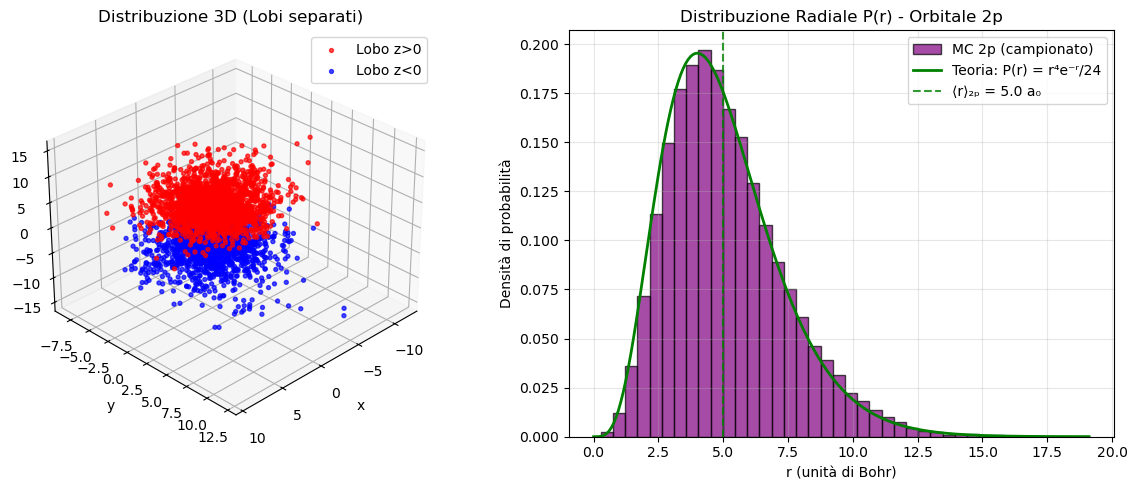


Caratteristiche dell'orbitale 2p:
  Simmetria: anisotropa lungo asse z
  Nodi: piano nodale x-y (z=0)
  Raggio medio: ⟨r⟩ = 5.15 a₀
  Picco teorico: r = 4.0 a₀
  Picco osservato: r = 4.0 a₀


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

### **Visualizzazione 3D dell'Orbitale 2p: Struttura a Lobi**

# Carica le posizioni campionate
positions = np.loadtxt("positions_psi210.dat")

x = positions[:, 0]
y = positions[:, 1]
z = positions[:, 2]
r = np.sqrt(x**2 + y**2 + z**2)

print("=== VISUALIZZAZIONE 3D ORBITALE 2p ===")

# Subsampling per performance del rendering 3D
n_display = min(4000, len(positions))
indices = np.random.choice(len(positions), n_display, replace=False)
x_sub = x[indices]
y_sub = y[indices] 
z_sub = z[indices]

# Separazione nei due lobi
lobo_pos_mask = z_sub > 0
lobo_neg_mask = z_sub < 0

print(f"Punti visualizzati: {n_display}")
print(f"Lobo positivo (z>0): {np.sum(lobo_pos_mask)} punti")
print(f"Lobo negativo (z<0): {np.sum(lobo_neg_mask)} punti")
print(f"Estensione spaziale: {r.max():.1f} a₀")

fig = plt.figure(figsize=(12, 5))

# Subplot 3D con separazione lobi
ax = fig.add_subplot(121, projection='3d')

# Colora lobi diversamente
if np.any(lobo_pos_mask):
    ax.scatter(x_sub[lobo_pos_mask], y_sub[lobo_pos_mask], z_sub[lobo_pos_mask], 
               c='red', s=8, alpha=0.7, label='Lobo z>0')
if np.any(lobo_neg_mask):
    ax.scatter(x_sub[lobo_neg_mask], y_sub[lobo_neg_mask], z_sub[lobo_neg_mask], 
               c='blue', s=8, alpha=0.7, label='Lobo z<0')

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.set_title("Distribuzione 3D (Lobi separati)")
ax.view_init(elev=30, azim=45)
ax.legend()

# Distribuzione radiale per orbitale 2p
ax2 = fig.add_subplot(122)

# Istogramma radiale 2p campionato
ax2.hist(r, bins=40, density=True, alpha=0.7, color='purple', 
         edgecolor='black', label='MC 2p (campionato)')

# Distribuzione teorica radiale per 2p: P(r) = (r^4/24) * exp(-r)
# In unità di Bohr (a₀ = 1)
r_theory = np.linspace(0, r.max(), 200)
prob_2p_theory = (r_theory**4 / 24) * np.exp(-r_theory)

ax2.plot(r_theory, prob_2p_theory, 'g-', linewidth=2, 
         label='Teoria: P(r) = r⁴e⁻ʳ/24')

ax2.axvline(5.0, color='green', linestyle='--', alpha=0.8, label='⟨r⟩₂ₚ = 5.0 a₀')

ax2.set_xlabel("r (unità di Bohr)")
ax2.set_ylabel("Densità di probabilità")
ax2.set_title("Distribuzione Radiale P(r) - Orbitale 2p")
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Analisi morfologia
momento_2_z = np.mean(z**2)
momento_2_xy = np.mean(x**2 + y**2) 
anisotropy_ratio = momento_2_z / momento_2_xy

print(f"\nCaratteristiche dell'orbitale 2p:")
print(f"  Simmetria: anisotropa lungo asse z")
print(f"  Nodi: piano nodale x-y (z=0)")
print(f"  Raggio medio: ⟨r⟩ = {np.mean(r):.2f} a₀")

# Verifica del picco teorico
r_peak_theory = 4.0  # Il massimo di r⁴e⁻ʳ è in r=4
r_peak_observed = r_theory[np.argmax(prob_2p_theory)]
print(f"  Picco teorico: r = {r_peak_theory:.1f} a₀")
print(f"  Picco osservato: r = {r_peak_observed:.1f} a₀")

### **Confronto Quantitativo: Orbitali 1s vs 2p**

L'analisi Monte Carlo degli orbitali dell'idrogeno rivela le differenze fondamentali tra stato fondamentale e primo stato eccitato:

**Numeri Quantici e Struttura:**
- **1s**: n=1, l=0, m=0 → Simmetria sferica perfetta
- **2p**: n=2, l=1, m=0 → Anisotropia con preferenza direzionale lungo z
- **Scaling teorico**: ⟨r⟩ ∝ n² per l'idrogeno

**Significato dei Nodi:**
- **2p**: Probabilità nulla al nucleo (nodo radiale), massimo a ~4a₀

**Anisotropia Spaziale:**
- **1s**: Var(x) ≈ Var(y) ≈ Var(z) (isotropia)
- **2p**: Var(z) > Var(x) ≈ Var(y) (preferenza asse z)
